In [1]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pickle
#%matplotlib inline
#%pylab inline
#pylab.rcParams['figure.figsize'] = (7.0, 5.0)
import scipy.stats as sc
from IPython.display import HTML, display
import ipywidgets as wg

# Correlation time

In [2]:
def uncorr_err(Lx_err, Lx_tau):
    Lx_max_tau = []
    for i,taus in enumerate(Lx_tau[:len(Lx_err)]):
        max_tau = np.nanmax(taus)
        x_max_tau = np.tile(max_tau, len(taus))
        Lx_max_tau.append(x_max_tau)
    Lx_terr = np.sqrt((1+2*np.array(Lx_max_tau))*np.array(Lx_err))
    return(Lx_terr)

In [3]:
nwpCorrData = pickle.load(open('nwp1DcorrData.p', 'rb'))
possibleScales = nwpCorrData['possibleScales']; temperatures = nwpCorrData['temperatures']
LcorrEnw_data = nwpCorrData['LcorrEnw_data']; LtauEnw_data = nwpCorrData['LtauEnw_data']
nwpLcorrMdata = nwpCorrData['LcorrMdata']; nwpLtauMdata = nwpCorrData['LtauMdata']

CorrData = pickle.load(open('1DcorrData.p', 'rb'))
IpossibleScales = CorrData['possibleScales']; Itemperatures = CorrData['temperatures']
LcorrEdata = CorrData['LcorrEdata']; LtauEdata = CorrData['LtauEdata']
LcorrMdata = CorrData['LcorrMdata']; LtauMdata = CorrData['LtauMdata']

if not np.array_equal(temperatures, Itemperatures):
    raise ValueError('different temperatures or scales were used in simulation with network probability versus Ising model')
if not np.array_equal(possibleScales,IpossibleScales):
    raise ValueError('different scales were used in simulation with network probability versus Ising model')

In [4]:
tauData = [['','MAXtauEnw', 'MAXtauM']]

for i,L in enumerate(possibleScales):
    row = []
    tauEnw = round(max(LtauEnw_data[i]),3); tauM = round(max(LtauMdata[i]),3)
    j = np.nanargmax(LtauEnw_data[i]); k = np.nanargmax(LtauMdata[i])
    T1 = temperatures[j]; T2 = temperatures[k]
    row.append('L = %d'%(L)); row.append('%.1f (T=%.2f)'%(tauEnw,T1)); row.append('%.1f (T=%.2f)'%(tauM,T2))
    tauData.append(row)
    
display(HTML(
   '<table><tr>{}</tr></table>'.format(
       '</tr><tr>'.join(
           '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in tauData)
       )
))

,MAXtauEnw,MAXtauM
L = 64,12.0 (T=0.64),9.3 (T=8.00)
L = 256,19.1 (T=0.49),39.6 (T=8.00)
L = 784,29.4 (T=0.49),129.8 (T=7.01)
L = 1024,32.0 (T=0.38),136.6 (T=4.12)


L = 256


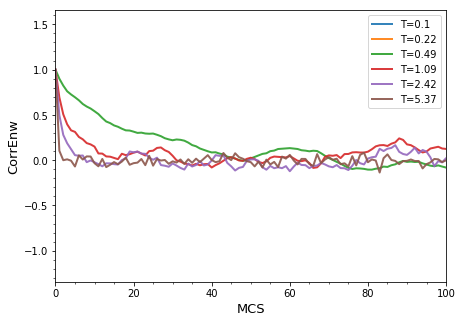

In [5]:
save = False

fig = plt.figure(figsize=(7,5))
ax1 = fig.add_subplot(1,1,1)
t = np.arange(len(LcorrEnw_data[0][0]))
i = 1 # index of scales
k = 0 # index of temperature
step = 6

for j, item in enumerate(temperatures[::step]):
    if j == j:
        ax1.plot(t,LcorrEnw_data[i][j*step], linewidth=2, label=('T={}'.format(np.around(item,2))), alpha=0.9)

    
ax1.set_xlabel('MCS',fontsize=13); ax1.set_ylabel('CorrEnw', fontsize=13)
ax1.legend()
ax1.set_xlim([0,100])
ax1.minorticks_on()

print('L = %d'%(possibleScales[i]))
#print('Correlation time (decay length) of the energy(nng):', LtauEnw[i])
#print('Correlation time (decay length) of the magnetization:', LtauM[i])
if save:
    plt.savefig('nwp1DcorrEnw_vs_t')

# Energy function

In [6]:
nwpLdata = pickle.load(open('nwp1Dfinite_size_scaling_data.p', 'rb'))
Len_nw_data = nwpLdata['Len_nw_data']; Len_nw_err = nwpLdata['Len_nw_err']; L_CvEnw_data = nwpLdata['L_CvEnw_data']
temperatures = nwpLdata['temperatures']; scales = nwpLdata['scales']; t_prod = nwpLdata['t_prod']

Ldata = pickle.load(open('1Dfinite_size_scaling_data.p', 'rb'))
Len_data = Ldata['Len_data']; Len_err = Ldata['Len_err']; Lnng_data = Ldata['Lnng_data']; Lnng_err = Ldata['Lnng_err']
L_CvEdata = Ldata['L_CvEdata']; L_Cv_nng_data = Ldata['L_Cv_nng_data']; Itemperatures = Ldata['temperatures']
Iscales = Ldata['scales']; It_prod = Ldata['t_prod']

print('results with network probability were gathered from the following number of sampled configurations:', t_prod)
print('results for the regular Ising model were gathered from the following number of sampled configurations:', It_prod)

if not np.array_equal(temperatures, Itemperatures):
    raise ValueError('different temperatures or scales were used in simulation with network probability versus Ising model')
if not np.array_equal(scales,Iscales):
    raise ValueError('different scales were used in simulation with network probability versus Ising model')
    
#Lnng_data = np.array(Lnng_data); substract = np.array(scales)
#substract = substract[:,np.newaxis]
#substract = tile(substract, (1,Lnng_data.shape[1]))

#Lnng_data = (Lnng_data-substract)/substract

results with network probability were gathered from the following number of sampled configurations: 10000
results for the regular Ising model were gathered from the following number of sampled configurations: 25000


In [7]:
Len_nw_terr = uncorr_err(Len_nw_err, LtauEnw_data); Len_terr = uncorr_err(Len_err, LtauEdata)
print(Len_nw_terr)
print(Len_terr)

[[ 0.          0.          0.          1.31578003  3.04400349  2.96446326
   4.91716959  4.98270658  4.76405423  4.29208289  4.11690022  4.34885278
   5.47592498  7.02983521  9.20734689 10.58921653 10.9912034  11.07487033
  11.07199059 11.3624967  11.60201185 11.9011871  12.5664359  13.00165037
  13.44553609 13.85923765 14.05491626 14.27544352 14.31595304 14.37811009
  14.34742644 14.44164737 14.51108836 14.43669714]
 [ 0.          1.25069281  1.48718398  1.9358025   4.49963188  6.2521293
   5.61454934  5.3441857   2.74021962  3.40598937  7.49685468 11.39809733
  14.14954211 14.83614347 15.65418961 16.66386716 17.16054001 18.24226426
  19.56427546 21.19512722 21.89882606 22.12038656 22.43453281 22.92052051
  23.43137485 24.09851739 24.59681484 25.06199769 25.13211556 25.52520272
  25.73427738 25.71552555 25.8506709  25.91716   ]
 [ 0.          0.          2.3658726   2.8882881   6.43941374  0.
   5.28865487  4.57151632 13.82071548 15.51024608 16.07542691 18.71875121
  21.2572123  23.54

##### Finite size scaling 

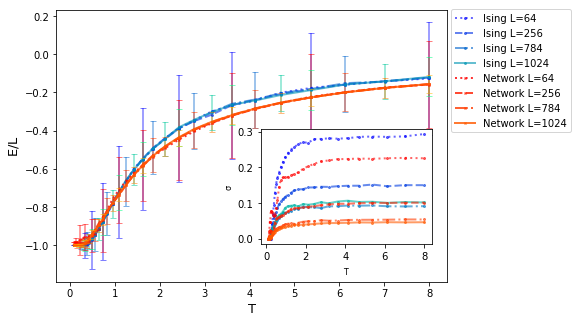

In [8]:
save = False

fig = plt.figure(figsize=(7,5))#; fig.suptitle('1D')
ax1 = fig.add_subplot(1,1,1)#; ax2 = ax1.twinx()
ax1.set_xlabel('$\mathrm{T}$',fontsize=13)
ax1.set_ylabel('$\mathrm{E/L}$', fontsize=13)#, color='orange')
#ax2.set_ylabel('$\mathrm{E_{nw}/L}$', fontsize=13, color='r')
ls = [':', '--', '-.', '-'] #color=cm.viridis(i*70; cm.autumn; cm.winter
left, bottom, width, height = [0.53, 0.23, 0.34, 0.32]
ax3 = fig.add_axes([left, bottom, width, height])
ax3.set_xlabel('$\mathrm{T}$',fontsize=8)
ax3.set_ylabel('$\mathrm{\sigma}$', fontsize=8)

for i,L in enumerate(scales[0:]):
    ax1.plot(temperatures, Len_data[i]/L, marker='o', markersize=2, alpha=0.6, label='Ising L=%d'%(L), 
             color=cm.winter(i*50), linestyle=ls[i], linewidth=2)
    ax1.errorbar(temperatures[i:], Len_data[i][i:]/L, yerr=Len_terr[i][i:]/L, alpha=0.5, color=cm.winter(i*100), linestyle='', 
                 errorevery=3, capsize=3)
    ax3.plot(temperatures[i:], Len_terr[i][i:]/L,  marker='o', markersize=2, alpha=0.6, label='L=%d'%(L), color=cm.winter(i*60), 
             linestyle=ls[i], linewidth=2)
    
for i,L in enumerate(scales[0:]): 
    ax1.plot(temperatures, Len_nw_data[i]/L, marker='x',markersize=2, alpha=0.8, label='Network L=%d'%(L), 
             color=cm.autumn(i*30), linestyle=ls[i], linewidth=2)
    ax1.errorbar(temperatures[i:], Len_nw_data[i][i:]/L, yerr=Len_nw_terr[i][i:]/L, alpha=0.5, color=cm.autumn(i*60), 
                 linestyle='', errorevery=3, capsize=3)
    ax3.plot(temperatures, Len_nw_terr[i]/L,  marker='o', markersize=2, alpha=0.6, label='L=%d'%(L), color=cm.autumn(i*30), 
             linestyle=ls[i], linewidth=2)
    
ax1.legend(loc=[1.01,0.55]); 
#ax2.legend(loc='lower right')

if save:
    plt.savefig('nwp1D_L_E_Enw_vs_T')

In [9]:
LrEnwE = (np.array(Len_nw_data))/(np.array(Len_data))
print(LrEnwE)

[[0.984375   0.984375   0.984375   0.9843375  0.9832625  0.98337812
  0.97273125 0.96690171 0.96228276 0.95861029 0.95820198 0.96353351
  0.97608603 0.99328281 1.00146655 0.99224512 0.97823663 0.96858421
  0.98349626 0.99583526 1.03730256 1.05821193 1.08456059 1.11721277
  1.15612228 1.16974497 1.20645742 1.20405041 1.17575992 1.26115142
  1.26255983 1.24546088 1.22907641 1.25157552]
 [0.99609375 0.99609063 0.9960875  0.99607578 0.99552969 0.99204922
  0.98988304 0.98958161 0.988844   0.99084054 0.99519211 0.99973081
  0.980565   0.97373945 0.96963542 0.97389768 0.98160958 0.99591696
  1.02000955 1.03261538 1.04361327 1.05709012 1.07899902 1.10084096
  1.12943368 1.1314576  1.13449792 1.20590413 1.20002955 1.22316689
  1.23136286 1.26308259 1.245137   1.2800045 ]
 [0.99872449 0.99872449 0.99871888 0.99871199 0.9983673  0.99617428
  0.99634715 0.99645744 0.99114094 0.99784718 0.98905551 0.98415766
  0.97762753 0.97658459 0.97954483 0.9849548  0.99429821 0.99638377
  1.00923742 1.0214200

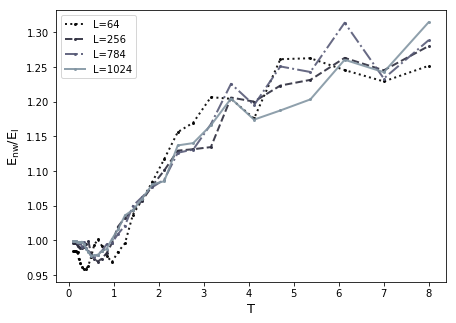

In [10]:
save = False

fig = plt.figure(figsize=(7,5))#; fig.suptitle('1D')
ax1 = fig.add_subplot(1,1,1)#; ax2 = ax1.twinx()
ax1.set_xlabel('$\mathrm{T}$',fontsize=13)
ax1.set_ylabel('$\mathrm{E_{nw}/E_I}$', fontsize=13)#, color='orange')
ls = [':', '--', '-.', '-'] #color=cm.viridis(i*70)
left, bottom, width, height = [0.53, 0.38, 0.34, 0.32]
#ax3 = fig.add_axes([left, bottom, width, height])
#ax3.set_xlabel('$\mathrm{T}$',fontsize=8)
#ax3.set_ylabel('$\mathrm{\sigma}$', fontsize=8)

for i,L in enumerate(scales[0:]):
    ax1.plot(temperatures, LrEnwE[i], marker='o', markersize=2, alpha=0.9, label='L=%d'%(L), 
             color=cm.bone(i*50), linestyle=ls[i], linewidth=2)

    
ax1.legend(loc='upper left'); 
#ax2.legend(loc='lower right')

if save:
    plt.savefig('nwp1D_LrEnwE_vs_T')

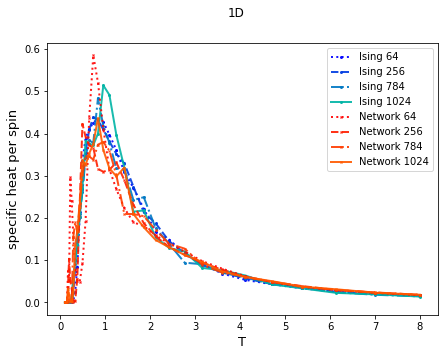

In [11]:
save = False

fig1 = plt.figure(figsize=(7,5)); fig1.suptitle('1D')
ax11 = fig1.add_subplot(1,1,1)#; ax12 = ax11.twinx()
ax11.set_xlabel('$\mathrm{T}$',fontsize=13)
ax11.set_ylabel('specific heat per spin', fontsize=13)#, color='orange')
#ax12.set_ylabel('Network specific heat per spin', fontsize=13, color='r')
ls = [':', '--', '-.', '-']

for i,L in enumerate(scales):
    ax11.plot(temperatures, L_CvEdata[i]/L, marker='o', markersize=2, alpha=0.9, label='Ising %d'%(L), color=cm.winter(i*60),
              linestyle=ls[i], linewidth=2)
for i,L in enumerate(scales):   
    ax11.plot(temperatures, L_CvEnw_data[i]/L, marker='x',markersize=2, alpha=0.9, label='Network %d'%(L), color=cm.autumn(i*30),
              linestyle=ls[i], linewidth=2)
ax11.legend(loc='upper right')
#ax12.legend(loc='center right')

if save:
    plt.savefig('nwp1D_L_CvE_CvEnw_vs_T')

##### Magnetization

In [12]:
nwpLdata_mag = pickle.load(open('nwp1Dfinite_size_scaling_data_mag.p', 'rb'))
nwpLmag_data= nwpLdata_mag['Lmag_data']; nwpLmag_err = nwpLdata_mag['Lmag_err']; nwpLsusc_data = nwpLdata_mag['Lsusc_data']
temperatures = nwpLdata_mag['temperatures']; scales = nwpLdata_mag['scales']

Ldata_mag = pickle.load(open('1Dfinite_size_scaling_data_mag.p', 'rb'))
Lmag_data= Ldata_mag['Lmag_data']; Lmag_err = Ldata_mag['Lmag_err']; Lsusc_data = Ldata_mag['Lsusc_data']
Itemperatures = Ldata_mag['temperatures']; Iscales = Ldata_mag['scales']

if not np.array_equal(temperatures, Itemperatures):
    raise ValueError('different temperatures or scales were used in simulation with network probability versus Ising model')
if not np.array_equal(scales,Iscales):
    raise ValueError('different scales were used in simulation with network probability versus Ising model')

In [13]:
nwpLmag_terr = uncorr_err(nwpLmag_err, nwpLtauMdata); Lmag_terr = uncorr_err(Lmag_err, LtauMdata)
print(nwpLmag_terr)
print(Lmag_terr)

[[  0.           0.           0.           3.93547035  23.81329943
   21.63120507  41.11196593  43.27914757  42.13074089  41.18769144
   38.93933732  39.54190387  38.50752786  38.97254322  38.27427798
   35.17123711  33.99818221  32.30386258  31.40246291  30.23053001
   29.48805323  28.46109133  28.01885328  26.9761975   26.65699406
   25.76844072  24.92728327  24.50006179  24.02095326  23.48207203
   22.86062871  22.49363802  22.04891721  22.04497123]
 [  0.           4.24885902   5.02202407   7.47980743  59.27882045
  119.5889613  121.06503539 114.40569091 116.26591858 115.15935342
  117.16442079 111.17419822  99.48752082  94.74013811  94.5484741
   94.28005281  87.91133258  85.19300129  81.3417421   77.63276523
   73.9242285   71.32178201  65.13952206  64.88717996  62.20511332
   59.94339605  57.1048869   55.76931165  53.53484096  52.27813017
   51.30294181  50.04274243  49.29872526  48.20493773]
 [  0.           0.           9.35338158  11.54810469  72.64171118
  148.24702867 169.1

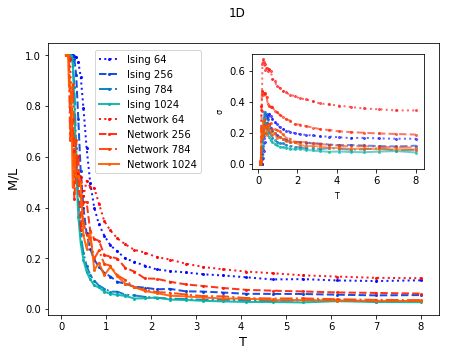

In [14]:
save = False

fig = plt.figure(figsize=(7,5)); fig.suptitle('1D')
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel('$\mathrm{T}$',fontsize=13)
ax1.set_ylabel('$\mathrm{M/L}$', fontsize=13)#, color='b')
ls = [':', '--', '-.', '-'] #color=cm.viridis(i*70)
left, bottom, width, height = [0.53, 0.53, 0.34, 0.32]
ax3 = fig.add_axes([left, bottom, width, height])
ax3.set_xlabel('$\mathrm{T}$',fontsize=8)
ax3.set_ylabel('$\mathrm{\sigma}$', fontsize=8)

for i,L in enumerate(scales):
    ax1.plot(temperatures, Lmag_data[i]/L, marker='o', markersize=2, alpha=0.9, label='Ising %d'%(L), 
             color=cm.winter(i*60), linestyle=ls[i], linewidth=2)
    #ax1.errorbar(temperatures, Lmag_data[i]/L, yerr=Lmag_terr[i]/L, alpha=0.6, color=cm.winter(i*100), linestyle='', 
                 #capsize=3, errorevery=3)
    ax3.plot(temperatures[i:], Lmag_terr[i][i:]/L,  marker='o', markersize=2, alpha=0.6, label='L=%d'%(L), color=cm.winter(i*60), 
             linestyle=ls[i], linewidth=2)
    
for i,L in enumerate(scales):
    ax1.plot(temperatures, nwpLmag_data[i]/L, marker='o', markersize=2, alpha=0.9, label='Network %d'%(L), 
             color=cm.autumn(i*30), linestyle=ls[i], linewidth=2)
    #ax1.errorbar(temperatures[i:], nwpLmag_data[i][i:]/L, yerr=nwpLmag_terr[i][i:]/L, alpha=0.8, color=cm.autumn(i*60), 
                 #linestyle='', capsize=3, errorevery=3)
    ax3.plot(temperatures, nwpLmag_terr[i]/L,  marker='o', markersize=2, alpha=0.6, label='L=%d'%(L), color=cm.autumn(i*30), 
             linestyle=ls[i], linewidth=2)
    
ax1.legend(loc=[0.12,0.52])

if save:
    plt.savefig('nwp1D_L_M_vs_T')

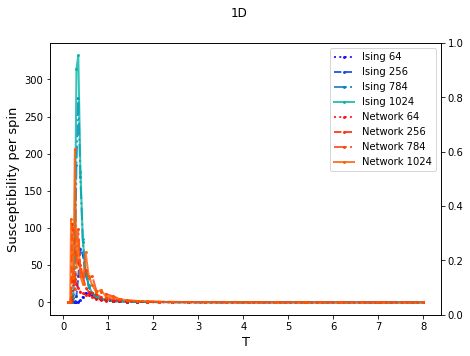

In [15]:
save = False

fig1 = plt.figure(figsize=(7,5)); fig1.suptitle('1D')
ax11 = fig1.add_subplot(1,1,1); ax12 = ax11.twinx()
ax11.set_xlabel('$\mathrm{T}$',fontsize=13)
ax11.set_ylabel('Susceptibility per spin', fontsize=13)#, color='b')
ls = [':', '--', '-.', '-']

for i,L in enumerate(scales):
    ax11.plot(temperatures, Lsusc_data[i]/L, marker='o', markersize=2, alpha=0.8, label='Ising %d'%(L), color=cm.winter(i*60),
            linestyle=ls[i], linewidth=2)

for i,L in enumerate(scales):
    ax11.plot(temperatures, nwpLsusc_data[i]/L, marker='o', markersize=2, alpha=0.8, label='Network %d'%(L), 
              color=cm.autumn(i*30), linestyle=ls[i], linewidth=2)

ax11.legend()

if save:
    plt.savefig('nwp1Dsusc_vs_T')

##### Collisions relative frequency

In [16]:
nwpLdata_col = pickle.load(open('nwp1Dfinite_size_scaling_data_col.p', 'rb'))
nwpLcol_data= nwpLdata_col['Lcol_data']; nwpLcol_norm_data = nwpLdata_col['Lcol_norm_data']
temperatures = nwpLdata_col['temperatures']; scales = nwpLdata_col['scales']

C:\Users\Joseph\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


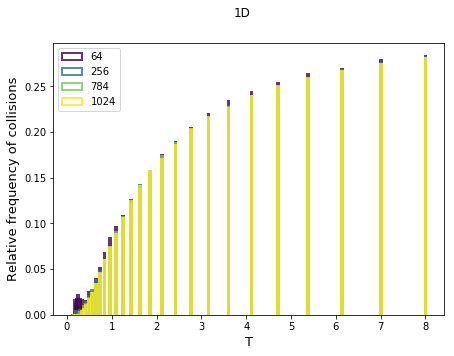

In [17]:
save = False

fig1 = plt.figure(figsize=(7,5)); fig1.suptitle('1D')
ax11 = fig1.add_subplot(1,1,1)

ax11.set_xlabel('$\mathrm{T}$',fontsize=13)
ax11.set_ylabel('Relative frequency of collisions', fontsize=13, color='black')

for i,L in enumerate(scales):
    ax11.bar(temperatures, nwpLcol_data[i]/nwpLcol_norm_data[i], align='center', width=0.04, alpha=0.8, label='%d'%(L), 
             color=cm.viridis(i*100), fill=False, edgecolor=cm.viridis(i*100), linewidth=2)
    
ax11.legend(loc='upper left')

if save:
    plt.savefig('nwp1Drfreq_col_vs_T')

# Free energy

In [18]:
nwpLf_data = pickle.load(open('nwp1Dfree_energy_finite_size_scaling.p', 'rb'))
f_exact = nwpLf_data['f_exact']; Len_nw_fr = nwpLf_data['Len_nw_fr']; Len_nwS = nwpLf_data['Len_nwS'] 
Len_nw_data = nwpLf_data['Len_nw_data'] ; Len_nw_err = nwpLf_data['Len_nw_err'] 
Len_nw_hist_data = nwpLf_data['Len_nw_hist_data']; Len_nw_bin_edges_data = nwpLf_data['Len_nw_bin_edges_data']
temperatures = nwpLf_data['temperatures']; scales = nwpLf_data['scales']; t_prod = nwpLf_data['t_prod']

Lf_data = pickle.load(open('1Dfree_energy_finite_size_scaling.p', 'rb'))
Len_fr = Lf_data['Len_fr']; LenS = Lf_data['LenS']; Len_data = Lf_data['Len_data']; Len_err = Lf_data['Len_err']; 
Itemperatures = Lf_data['temperatures']; Iscales= Lf_data['scales']; It_prod = Lf_data['t_prod'] 

if not np.array_equal(temperatures, Itemperatures):
    raise ValueError('different temperatures or scales were used in simulation with network probability versus Ising model')
if not np.array_equal(scales,Iscales):
    raise ValueError('different scales were used in simulation with network probability versus Ising model')
    
print('results with network probability were gathered from the following number of sampled configurations:', t_prod)
print('results for the regular Ising model were gathered from the following number of sampled configurations:', It_prod)

results with network probability were gathered from the following number of sampled configurations: 20000
results for the regular Ising model were gathered from the following number of sampled configurations: 40000


In [19]:
Len_nw_fr_err = []; Len_fr_err = []

for i,L in enumerate(scales):
    e = abs(Len_nw_fr[i]/L-f_exact)
    Len_nw_fr_err.append(e)
    Ie = abs(Len_fr[i]/L-f_exact)
    Len_fr_err.append(Ie)


##### Energy histograms 

In [20]:
def check_visual(i, hists, bins):

    fig = plt.figure(figsize=(7,5))
    ax = fig.add_subplot(1,1,1)
    
    b1 = bins[i]
    h1 = hists[i]
    print(b1)
    l = np.argmax(h1)
    temperature1 = temperatures[i]
    
    b2 = bins[i+1]
    h2 = hists[i+1]
    k = np.argmax(h2)+1
    temperature2 = temperatures[i+1]
    
    ax.plot(b1/L, h1,label='T=%.2f'%(temperature1), markersize=3, linestyle='-', marker='o', linewidth=1, color='#1f77b4')
    ax.plot(b1[l:]/L, h1[l:], markersize=6, color='#1f77b4', marker='o', linewidth=2)
    
    ax.plot(b2/L, h2,label='T=%.2f'%(temperature2), markersize=3, linestyle='-', marker='o', linewidth=1, color='orange')
    ax.plot(b2[:k]/L, h2[:k], markersize=6, color='orange', marker='o', linewidth=2)
    
    ax.legend()
    #ax5.set_yscale('log')

Scale=64


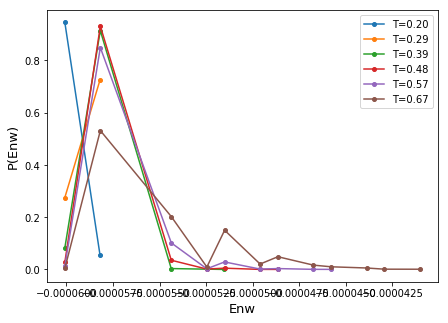

In [21]:
%matplotlib inline
fig5 = plt.figure(figsize=(7,5))
ax5 = fig5.add_subplot(1,1,1)
ax5.set_xlabel('Enw', fontsize=13)
ax5.set_ylabel('P(Enw)', fontsize=13)

idx = 0
print('Scale=%d'%(scales[idx]))
l = 1
k = 6
for i,temperature in enumerate(temperatures[l:k+1]):
    ax5.plot(Len_nw_bin_edges_data[idx][l+i]/(L**2), Len_nw_hist_data[idx][l+i],label='T=%.2f'%(temperature), markersize=4, 
             linestyle='-',  marker='o')
    
ax5.legend()
#ax5.set_yscale('log')

save = False
if save:
    plt.savefig('nwp1Den_nw_hist_%d_%d'%(l,k))

In [22]:
print('Scale=%d'%(scales[idx]))
wg.interact(check_visual, hists=wg.fixed(Len_nw_hist_data[idx]), bins=wg.fixed(Len_nw_bin_edges_data[idx]), 
            i=(0,len(temperatures)-2))

Scale=64


interactive(children=(IntSlider(value=11, description='i', max=23), Output()), _dom_classes=('widget-interact'…

<function __main__.check_visual(i, hists, bins)>

##### Free energy finite size scaling 

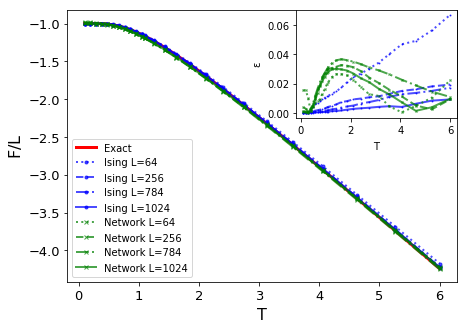

In [23]:
save = False
fig = plt.figure(figsize=(7,5))#; fig.suptitle('1D')
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel('$\mathrm{T}$',fontsize=16)
ax1.set_ylabel('$\mathrm{F/L}$', fontsize=16)#, color='b')
ax1.tick_params(axis='both', which='both', labelsize=13)
ls = [':', '--', '-.', '-'] #color=cm.viridis(i*70)
ax1.plot(temperatures, f_exact, alpha=1, label='Exact', color='r', linewidth=3)

left, bottom, width, height = [0.58, 0.58, 0.32, 0.3]
ax3 = fig.add_axes([left, bottom, width, height])
ax3.set_xlabel('$\mathrm{T}$',fontsize=10)
ax3.set_ylabel('$\mathrm{\epsilon}$', fontsize=10)

for i,L in enumerate(Iscales):
    ax1.plot(Itemperatures, Len_fr[i]/L, marker='o', markersize=3, alpha=0.7, label='Ising L=%d'%(L), 
             linestyle=ls[i], linewidth=2, color='b')
    #ax1.errorbar(temperatures, Len_data[i], yerr=Len_err[i], alpha=0.2, color=cm.viridis(i*70), linestyle='')
    ax3.plot(Itemperatures, Len_fr_err[i], marker='o',markersize=1, alpha=0.7, label='Ising %d'%(L), color='b', 
            linestyle=ls[i], linewidth=2)
for i,L in enumerate(scales):
    ax1.plot(temperatures, Len_nw_fr[i]/L, marker='x',markersize=4, alpha=0.7, label='Network L=%d'%(L), color='g', 
             linestyle=ls[i], linewidth=2)
    ax3.plot(temperatures, Len_nw_fr_err[i], marker='x',markersize=2, alpha=0.7, label='Network %d'%(L), color='g', 
            linestyle=ls[i], linewidth=2)
    
ax1.legend(loc='lower left', ncol=1)

if save:
    plt.savefig('nwp1D_Len_fr_Len_nw_fr_vs_T')

In [24]:
print(temperatures)
print(Itemperatures)

[0.1        0.195      0.29       0.385      0.48       0.575
 0.67       0.765      0.86       0.955      1.05       1.1
 1.25333284 1.42803929 1.62709868 1.85390565 2.11232804 2.40677283
 2.74226131 3.12451469 3.56005172 4.05629977 4.62172157 5.2659595
 6.        ]
[0.1        0.195      0.29       0.385      0.48       0.575
 0.67       0.765      0.86       0.955      1.05       1.1
 1.25333284 1.42803929 1.62709868 1.85390565 2.11232804 2.40677283
 2.74226131 3.12451469 3.56005172 4.05629977 4.62172157 5.2659595
 6.        ]


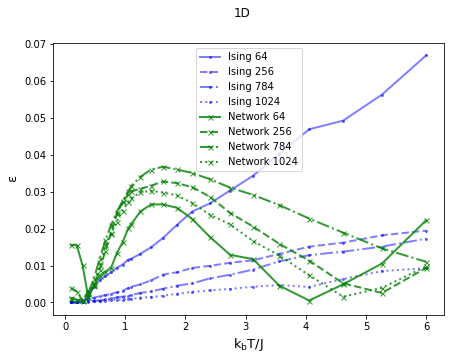

In [25]:
save = False

fig = plt.figure(figsize=(7,5)); fig.suptitle('1D')
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel('$\mathrm{k_bT/J}$',fontsize=13)
ax1.set_ylabel('$\mathrm{\epsilon}$', fontsize=13)#, color='b')
ls = ['-', '--', '-.', ':']#color=cm.viridis(i*70)

for i,L in enumerate(scales):
    ax1.plot(temperatures, Len_fr_err[i], marker='o', markersize=2, alpha=0.5, label='Ising %d'%(L), 
             linestyle=ls[i], linewidth=2, color='b')
for i,L in enumerate(scales):
    ax1.plot(temperatures, Len_nw_fr_err[i], marker='x',markersize=5, alpha=0.8, label='Network %d'%(L), color='g', 
             linestyle=ls[i], linewidth=2)
    
#ax1.legend(loc='upper left'); 
ax1.legend()

if save:
    plt.savefig('nwp1D_Len_fr_err_Len_nw_fr_err_vs_T')

Entropy:

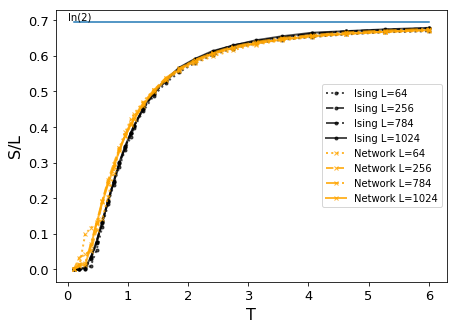

In [26]:
save = False

fig = plt.figure(figsize=(7,5))#; fig.suptitle('1D')
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel('$\mathrm{T}$',fontsize=16)
ax1.set_ylabel('$\mathrm{S/L}$', fontsize=16, color='black')
#ax1.set_ylim(-0.1,0.76)
ax1.tick_params(axis='both', which='both', labelsize=13)
ls = [':', '--', '-.', '-']#color=cm.viridis(i*70)

ax1.plot(temperatures, np.tile(np.log(2), len(temperatures)))
ax1.annotate('ln(2)', (0,0.7))


for i,L in enumerate(scales):
    ax1.plot(temperatures, LenS[i]/L, marker='o', markersize=3, alpha=0.7, label='Ising L=%d'%(L), 
             linestyle=ls[i], linewidth=2, color='black') 
for i,L in enumerate(scales):    
    ax1.plot(temperatures, Len_nwS[i]/L, marker='x',markersize=4, alpha=0.8, label='Network L=%d'%(L), color='orange', 
             linestyle=ls[i], linewidth=2)
    #Smax = (1-(2/L))*np.log(2)
    #ax1.plot(temperatures, np.tile(Smax, len(temperatures)), c='c')

ax1.legend(loc='center right')


if save:
    plt.savefig('nwp1D_LenS_Len_nwS_vs_T')

##### Check if added randomnes is subleading 

In [28]:
nwpLf_data = pickle.load(open('nwp1Dfree_energy_finite_size_scaling.p', 'rb'))
f_exact = nwpLf_data['f_exact']; Len_nw_fr = nwpLf_data['Len_nw_fr']; Len_nwS = nwpLf_data['Len_nwS'] 
Len_nw_data = nwpLf_data['Len_nw_data'] ; Len_nw_err = nwpLf_data['Len_nw_err'] 
Len_nw_hist_data = nwpLf_data['Len_nw_hist_data']; Len_nw_bin_edges_data = nwpLf_data['Len_nw_bin_edges_data']
temperatures = nwpLf_data['temperatures']; scales = nwpLf_data['scales']; t_prod = nwpLf_data['t_prod']

nwpLf_spec_data = pickle.load(open('nwp1Dfree_energy_finite_size_scalingSpec.p', 'rb'))
Len_nw_fr_spec = nwpLf_spec_data['Len_nw_fr']; Len_nwSspec = nwpLf_spec_data['Len_nwS']
Len_nw_data_spec = nwpLf_spec_data['Len_nw_data']; Len_nw_err_spec = nwpLf_spec_data['Len_nw_err']
spec_temperatures = nwpLf_spec_data['temperatures']; spec_scales= nwpLf_spec_data['scales']
spec_t_prod = nwpLf_spec_data['t_prod'] 

if not np.array_equal(temperatures, spec_temperatures):
    raise ValueError('different temperatures were used in simulation with network probability versus specific network probability')
if not np.array_equal(scales,spec_scales):
    raise ValueError('different scales were used in simulation with network probability versus specific network probability')
    
print('results with network probability were gathered from the following number of sampled configurations:', t_prod)
print('results with specific network probability were gathered from the following number of sampled configurations:', spec_t_prod)

results with network probability were gathered from the following number of sampled configurations: 20000
results with specific network probability were gathered from the following number of sampled configurations: 20000


Free Energy:

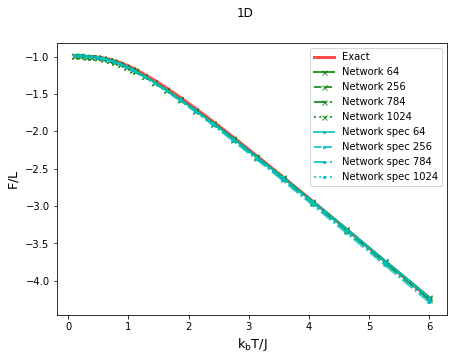

In [29]:
save = False

fig = plt.figure(figsize=(7,5)); fig.suptitle('1D')
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel('$\mathrm{k_bT/J}$',fontsize=13)
ax1.set_ylabel('$\mathrm{F/L}$', fontsize=13)#, color='b')
ls = ['-', '--', '-.', ':']#color=cm.viridis(i*70)
ax1.plot(temperatures, f_exact, alpha=0.7, label='Exact', color='r', linewidth=3)

#left, bottom, width, height = [0.22, 0.21, 0.34, 0.32]
#ax3 = fig.add_axes([left, bottom, width, height])
#ax3.set_xlabel('$\mathrm{T}$',fontsize=8)
#ax3.set_ylabel('$\mathrm{\epsilon}$', fontsize=8)

for i,L in enumerate(scales):
    ax1.plot(temperatures, Len_nw_fr[i]/L, marker='x',markersize=5, alpha=0.8, label='Network %d'%(L), color='g', 
             linestyle=ls[i], linewidth=2)
    #ax3.plot(temperatures, Len_nw_fr_err[i], marker='x',markersize=5, alpha=0.8, label='Network %d'%(L), color='g', 
            #linestyle=ls[i], linewidth=2)
for i,L in enumerate(spec_scales):
    ax1.plot(temperatures, Len_nw_fr_spec[i]/L, marker='s', markersize=2, alpha=0.8, label='Network spec %d'%(L), 
             linestyle=ls[i], linewidth=2, color='c')
    #ax1.errorbar(temperatures, Len_data[i], yerr=Len_err[i], alpha=0.2, color=cm.viridis(i*70), linestyle='')
    
ax1.legend()

if save:
    plt.savefig('nwp1D_Len_nw_fr_Len_nw_fr_spec_vs_T')

In [30]:
Len_nw_fr_err = []; Len_nw_fr_err_spec = []

for i,L in enumerate(scales):
    e = abs(Len_nw_fr[i]/L-f_exact)
    Len_nw_fr_err.append(e)
    spec_e = abs(Len_nw_fr_spec[i]/L-f_exact)
    Len_nw_fr_err_spec.append(spec_e)
    
LdFspecF = np.array(Len_nw_fr_spec)-np.array(Len_nw_fr)
print(LdFspecF)

[[ 0.00000000e+00 -1.23146322e-03  7.54776517e-03  3.33769228e-03
   1.91040975e-02 -1.16716385e-02  1.48445812e-02 -2.30084764e-02
  -1.40496746e-02 -9.33544354e-02 -5.44758379e-02 -7.37517690e-02
  -1.59823027e-01 -9.72844913e-02 -2.73511384e-01 -3.54954155e-01
  -4.82108576e-01 -4.21363260e-01 -3.92786728e-01 -1.90668651e-01
  -3.16593367e-01 -2.94070211e-01  6.14569114e-02 -8.86622375e-02
  -5.64246167e-01]
 [ 5.00012501e-06  1.53908936e-01  4.24498841e-01  5.99100161e-01
   8.64124699e-01  1.03652801e+00  9.72873839e-01  1.12994554e+00
   1.44036271e+00  1.39605422e+00  1.54865002e+00  1.53485538e+00
   1.18485940e+00  1.01434548e+00  1.11425354e+00  9.90278046e-01
   7.40973613e-01  1.52215294e-01 -6.30022804e-01 -7.98453246e-01
  -9.50061827e-01 -5.84350764e-01 -7.06331439e-01 -5.01516351e-01
  -2.73215662e-02]
 [ 0.00000000e+00 -1.19476854e-01 -1.76044350e-01  5.27740403e-01
   5.79082960e-01  5.70478325e-01  2.18387817e-01 -5.20127367e-02
  -4.40830961e-01 -9.36646359e-01 -1.3

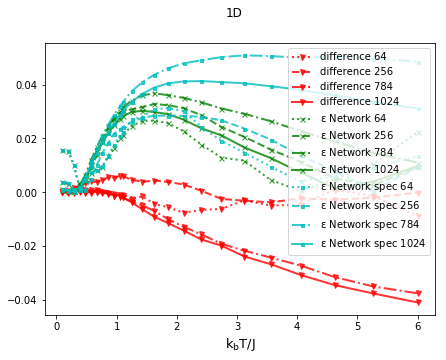

In [31]:
save = False

fig = plt.figure(figsize=(7,5)); fig.suptitle('1D')
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel('$\mathrm{k_bT/J}$',fontsize=13)
#ax1.set_ylabel('$\mathrm{\epsilon}$', fontsize=13)#, color='b')
ls = [':', '--', '-.', '-'] #color=cm.viridis(i*70)

for i,L in enumerate(scales):
    ax1.plot(temperatures, LdFspecF[i]/L, marker='v', markersize=5, alpha=0.8, label='difference %d'%(L), 
             linestyle=ls[i], linewidth=2, color='r')

for i,L in enumerate(scales):
    ax1.plot(temperatures, Len_nw_fr_err[i], marker='x', markersize=5, alpha=0.8, label='$\mathrm{\epsilon}$ Network %d'%(L), 
             linestyle=ls[i], linewidth=2, color='g')
for i,L in enumerate(scales):
    ax1.plot(temperatures, Len_nw_fr_err_spec[i], marker='s',markersize=3, alpha=0.8, 
             label='$\mathrm{\epsilon}$ Network spec %d'%(L), color='c', linestyle=ls[i], linewidth=2)
    
#ax1.legend(loc='upper left'); 
ax1.legend()

if save:
    plt.savefig('1D_Len_fr_err_Len_nw_fr_err_vs_T')

Entropy:

In [32]:
LdSspecS = np.array(Len_nwSspec)-np.array(Len_nwS)
print(LdSspecS)

[[ 0.00000000e+00  6.73408370e-02 -7.60267765e-02 -1.31656344e-01
  -7.90710365e-02  5.47515893e-01  5.70230132e-02  2.49618923e-01
  -1.71628285e-01  1.73878990e-01  1.83881750e-01  1.65183426e-01
   4.85603668e-01  3.52360397e-01  5.28493690e-01  4.76186129e-01
   5.34248732e-01  4.38414148e-01  3.18600830e-01  1.54589976e-01
   1.08184767e-01  2.23282835e-02 -1.08997676e-01 -7.53115862e-02
  -5.71730550e-03]
 [-1.05000125e-03 -4.34414839e+00 -1.41378911e+00 -2.49909133e+00
  -6.21822289e-01 -1.84187480e+00 -9.57871402e-01 -5.60843837e-01
  -1.16175896e+00 -9.23512271e-01 -2.45000019e-01 -4.58868531e-01
   1.03124290e+00  4.20159674e-01  8.09936406e-01  7.29984265e-01
   6.80825308e-01  9.41129416e-01  9.45997669e-01  6.22481709e-01
   3.63172203e-01 -1.61598600e-02 -2.12803507e-01 -4.27193496e-01
  -7.29321406e-01]
 [ 0.00000000e+00  9.71676174e-01 -7.82953444e-02  2.04768726e+00
   1.52431334e-01 -9.62918826e-01  7.14645050e-01  3.84250031e+00
   5.98166391e+00  4.02407996e+00  4.6

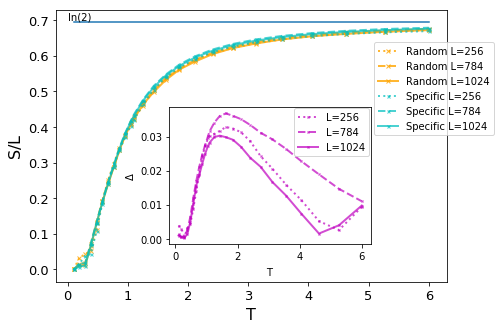

In [33]:
save = False
fig = plt.figure(figsize=(7,5))#; fig.suptitle('1D')
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel('$\mathrm{T}$',fontsize=16)
ax1.set_ylabel('$\mathrm{S/L}$', fontsize=16, color='black')
#ax1.set_ylim(-0.1,0.76)
ax1.tick_params(axis='both', which='both', labelsize=13)
ls = ['-.', ':', '--', '-']

left, bottom, width, height = [0.35, 0.23, 0.4, 0.38]
ax3 = fig.add_axes([left, bottom, width, height])
ax3.set_xlabel('$\mathrm{T}$',fontsize=10)
ax3.set_ylabel('$\mathrm{\Delta}$', fontsize=10)


ax1.plot(temperatures, np.tile(np.log(2), len(temperatures)))
ax1.annotate('ln(2)', (0,0.7))

for i,L in enumerate(scales):  
    if i>0:
        ax1.plot(temperatures, Len_nwS[i]/L, marker='x',markersize=4, alpha=0.8, label='Random L=%d'%(L), color='orange', 
                 linestyle=ls[i], linewidth=2)
        ax3.plot(temperatures, Len_nw_fr_err[i], marker='x',markersize=2, alpha=0.7, label='L=%d'%(L), color='m', 
                linestyle=ls[i], linewidth=2)
for i,L1 in enumerate(spec_scales):    
    if i>0:
        ax1.plot(spec_temperatures, Len_nwSspec[i]/L1, marker='x',markersize=3, alpha=0.7, label='Specific L=%d'%(L1), 
                 color='c', linestyle=ls[i], linewidth=2)

ax1.legend(loc=(0.815,0.54), ncol=1)
ax3.legend(loc=(0.62,0.64))

if save:
    plt.savefig('1DLen_nwS_Len_nwSspec_vs_T')

In [34]:
LrSspecS = (np.array(Len_nwSspec))/(np.array(Len_nwS))
print(LrSspecS)

[[       nan 1.10879399 0.98791597 0.98246161 0.99030638 1.06013894
  1.0044025  1.01436199 0.9921554  1.00705929 1.00682207 1.00591931
  1.01610767 1.01092607 1.01555743 1.01335107 1.01443539 1.01146468
  1.00809548 1.00382932 1.00263061 1.00053514 0.99741808 0.99823233
  0.99986648]
 [0.         0.49142879 0.87092855 0.81624483 0.97803885 0.96249641
  0.98501296 0.99262174 0.98664071 0.99035276 0.99763322 0.99574689
  1.00875934 1.00326748 1.00590459 1.00505682 1.00452936 1.00606728
  1.0059477  1.00383066 1.00219849 0.99990357 0.9987433  0.99749744
  0.9957574 ]
 [       nan 1.08067323 0.99431958 1.03655466 1.00147111 0.99361106
  1.00373487 1.01700024 1.02285588 1.01360481 1.01451134 1.01855562
  1.02009185 1.02478521 1.01789105 1.02150912 1.01689435 1.01489338
  1.01226728 1.01115319 1.00933412 1.00827441 1.00689454 1.00619628
  1.00503072]
 [       nan 0.69655308 0.89296258 1.02949042 1.00403141 1.00095647
  1.00818736 1.00686793 1.01135431 1.01523324 1.01836533 1.02007973
  1.02

C:\Users\Joseph\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


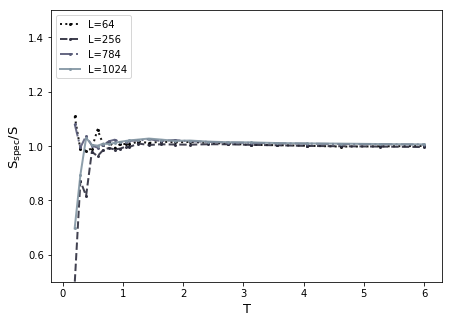

In [35]:
save = False

fig = plt.figure(figsize=(7,5))#; fig.suptitle('1D')
ax1 = fig.add_subplot(1,1,1)#; ax2 = ax1.twinx()
ax1.set_xlabel('$\mathrm{T}$',fontsize=13)
ax1.set_ylabel('$\mathrm{S_{spec}/S}$', fontsize=13)#, color='orange')
ls = [':', '--', '-.', '-'] #color=cm.viridis(i*70)
left, bottom, width, height = [0.53, 0.38, 0.34, 0.32]
#ax3 = fig.add_axes([left, bottom, width, height])
#ax3.set_xlabel('$\mathrm{T}$',fontsize=8)
#ax3.set_ylabel('$\mathrm{\sigma}$', fontsize=8)

for i,L in enumerate(scales[0:]):
    ax1.plot(temperatures, LrSspecS[i], marker='o', markersize=2, alpha=0.9, label='L=%d'%(L), 
             color=cm.bone(i*50), linestyle=ls[i], linewidth=2)

ax1.set_ylim(0.5,1.5)   
ax1.legend(loc='upper left'); 
#ax2.legend(loc='lower right')

if save:
    plt.savefig('nwp1D_LrSspecS_vs_T')

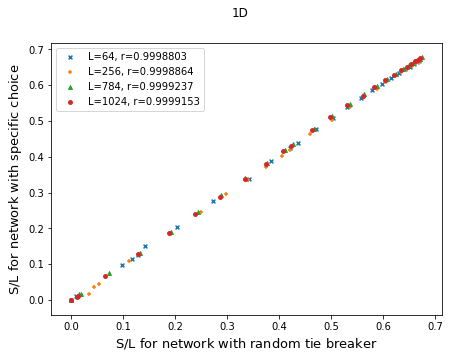

In [36]:
save = False

fig = plt.figure(figsize=(7,5)); fig.suptitle('1D')
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel('$\mathrm{S/L}$ for network with random tie breaker',fontsize=13)
ax1.set_ylabel('$\mathrm{S/L}$ for network with specific choice', fontsize=13)
ms = ['x', '+', '^', 'o'] #color=cm.viridis(i*70)

for i,L in enumerate(scales):
    L1 = spec_scales[i]
    rm = np.corrcoef(Len_nwS[i], Len_nwSspec[i]) 
    r = rm[0,1]
    ax1.scatter(Len_nwS[i]/L, Len_nwSspec[i]/L1, marker=ms[i], s=15, label='L=%d, r=%.7f'%(L,r))
    #ax1.plot(, , marker='o', markersize=2, alpha=0.6, label='%d'%(L), color='orange', 
     #        linestyle=ls[i], linewidth=0)

ax1.legend(loc='upper left'); 

if save:
    plt.savefig('1D_Len_nwS_vs_Len_nwSspec')